In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc

In [2]:
data=pd.read_csv("googleplaystore.csv")

In [3]:
data

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres Last Updated  \
0           Everyone               Art & Design    07-Jan-18   
1           Everyone  Art & Design;Pretend Play    15-Jan-18   
2           Everyone               Art & Design    01-Aug-18   
3               Teen               Art & Design    08-Jun-18   
4           Everyone    Art & Design;Creativity    20-Jun-18   
...              ...                        ...          ...   
10836       Everyone                  Education    25-Jul-17   
10837       Everyone                  Education    06-Jul-18   
10838       Everyone                    Medical    20-Jan-17   
10839     Mature 17+          Books & Reference    19-Jan-15   
10840       Everyone                  Lifestyle    25-Jul-18   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                   1          4.1 and up  
10838                   1          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

### Data Imputation

In [4]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
(data.isna().sum()/data.shape[0])*100

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

In [6]:
mean1=np.mean(data['Rating'])
mean1

4.193338315362448

In [7]:
data['Rating'].fillna(data['Rating'].mean(), inplace=True)

In [8]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [9]:
data['Type']= data['Type'].fillna(data['Type'].value_counts().index[0])

In [10]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [11]:
data['Content Rating']= data['Content Rating'].fillna(data['Content Rating'].value_counts().index[0])


In [12]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [13]:
data=data.dropna()

In [14]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

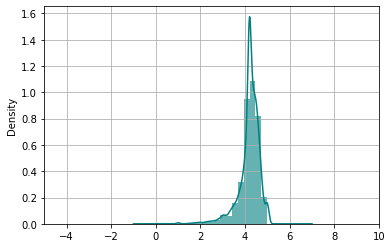

In [15]:
xt=data['Rating'].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data["Rating"].plot(kind='density', color='teal')

plt.grid()
plt.xlim(-5,10)
plt.show()

In [16]:
data[data['Rating']>5.0]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [17]:
data = data[data.Rating != 19]

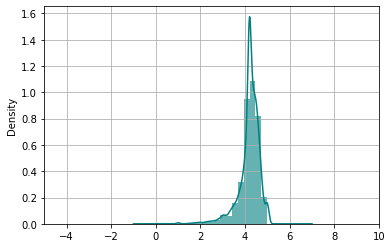

In [18]:
xt=data['Rating'].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data["Rating"].plot(kind='density', color='teal')

plt.grid()
plt.xlim(-5,10)
plt.show()

In [19]:
data1=data[['App','Category','Rating','Reviews','Size','Installs','Type','Price','Content Rating','Genres']]

In [20]:
data1.shape

(10830, 10)

In [21]:
data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [22]:
data1.drop_duplicates(inplace=True) 

<ipython-input-22-61c5a3008e92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop_duplicates(inplace=True)


In [23]:
data1['Installs']=data1['Installs'].str.replace(',','').str.replace('+','').astype('int')

<ipython-input-23-7ff84273aa2b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data1['Installs']=data1['Installs'].str.replace(',','').str.replace('+','').astype('int')
<ipython-input-23-7ff84273aa2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Installs']=data1['Installs'].str.replace(',','').str.replace('+','').astype('int')


In [24]:
data1['Reviews']=data1['Reviews'].astype('int')

<ipython-input-24-5163e509fa15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Reviews']=data1['Reviews'].astype('int')


In [25]:
data1['Size']=data1['Size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')

<ipython-input-25-7b9e60ae2656>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Size']=data1['Size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')


In [26]:
data1['Price']=data1['Price'].str.replace('$','').astype('float')

<ipython-input-26-c2e824b82429>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data1['Price']=data1['Price'].str.replace('$','').astype('float')
<ipython-input-26-c2e824b82429>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Price']=data1['Price'].str.replace('$','').astype('float')


In [27]:
data1.head(10)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

   Reviews        Size  Installs  Type  Price Content Rating  \
0      159  19000000.0     10000  Free    0.0       Everyone   
1      967  14000000.0    500000  Free    0.0       Everyone   
2    87510   8700000.0   5000000  Free    0.0       Everyone   
3   215644  25000000.0  50000000  Free    0.0           Teen   
4      967   2800000.0    100000  Free    0.0       Everyone   
5      167   5600000.0     50000  Free    0.0       Everyone   
6      178  19000000.0     50000  Free    0.0       Everyone   
7    36815  29000000.0   1000000  Free    0.0       Everyone   
8    13791  33000000.0   1000000  Free    0.0       Everyone   
9      121   3100000.0     10000  Free    0.0       Everyone   

                      Genres  
0               Art & Design  
1  Art & Design;Pretend Play  
2               Art & Design  
3               Art & Design  
4    Art & Design;Creativity  
5               Art & Design  
6               Art & Design  
7               Art & Design  
8               Art & Design  
9    Art & Design;Creativity

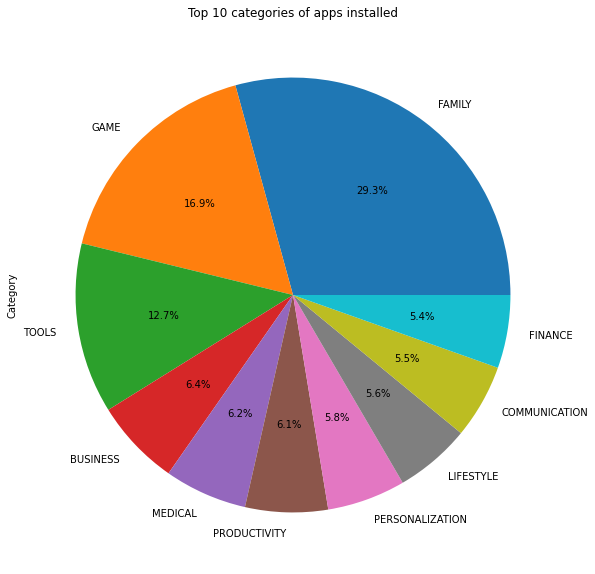

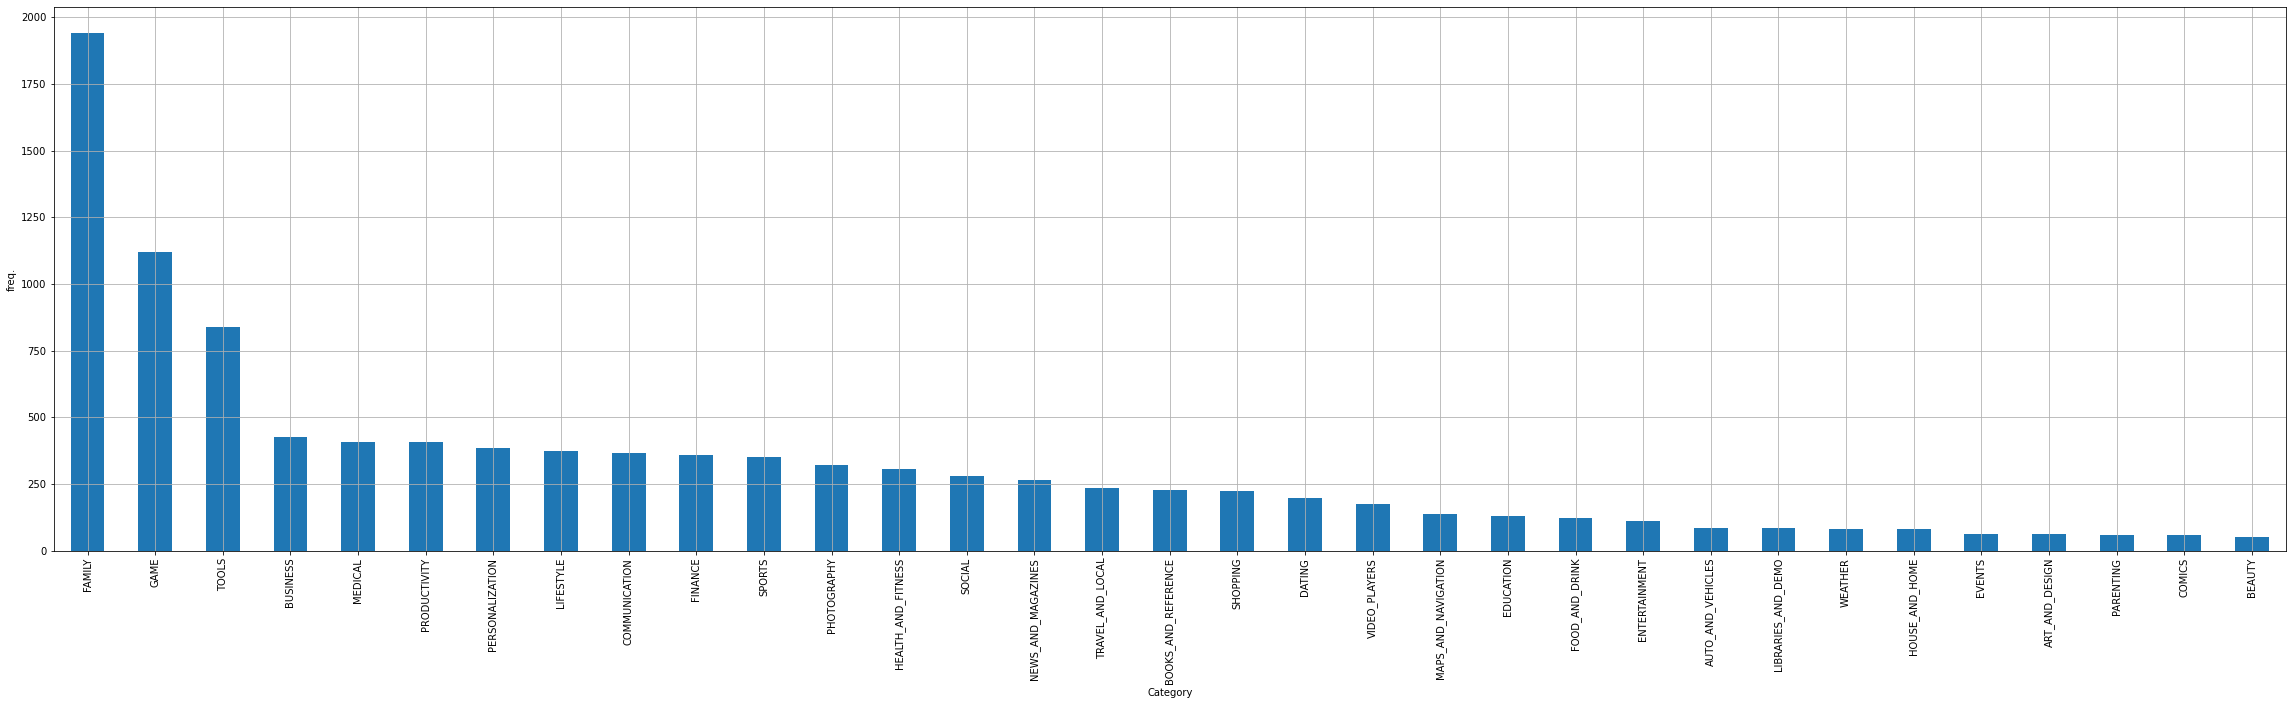

In [28]:
plt.figure(figsize=(40,10))
data1['Category'].value_counts().head(10).plot(kind='pie',autopct='%1.1f%%')
plt.title("Top 10 categories of apps installed")
plt.show()
plt.figure(figsize=(40,10))
data1['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('freq.')
plt.grid()
plt.show()

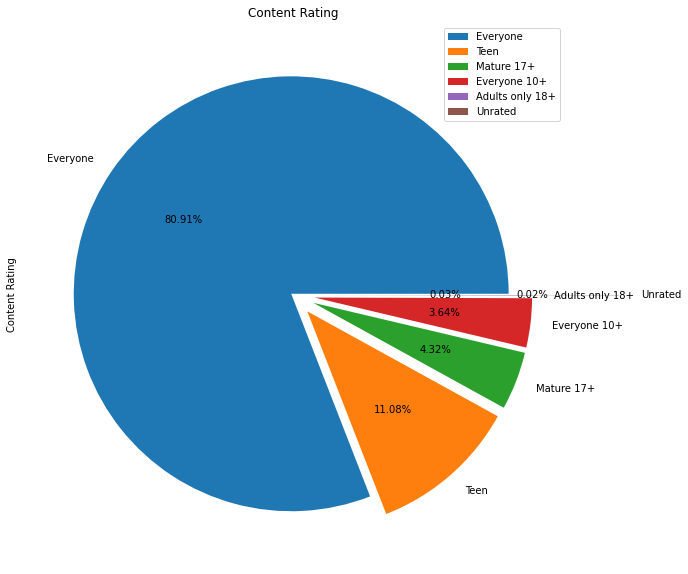

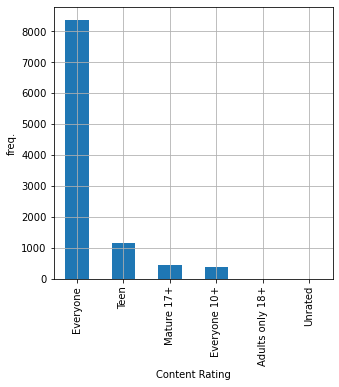

In [29]:
plt.figure(figsize=(40,10))
explode=[0.01,0.1,0.1,0.1,0.1,0.5]
data1['Content Rating'].value_counts().plot(kind='pie',autopct="%.2f%%",explode=explode)
plt.legend()
plt.title("Content Rating")
plt.show()

plt.figure(figsize=(5,5))
data1['Content Rating'].value_counts().plot(kind='bar')
plt.xlabel('Content Rating')
plt.ylabel('freq.')
plt.grid()
plt.show()

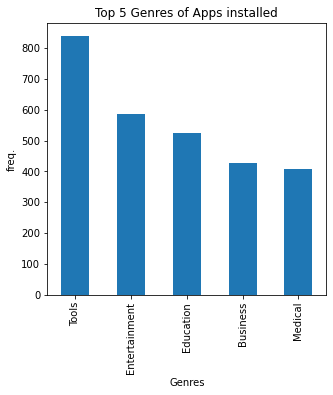

In [30]:
plt.figure(figsize=(5,5))
data1['Genres'].value_counts().head(5).plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('freq.')
plt.title("Top 5 Genres of Apps installed")
plt.show()

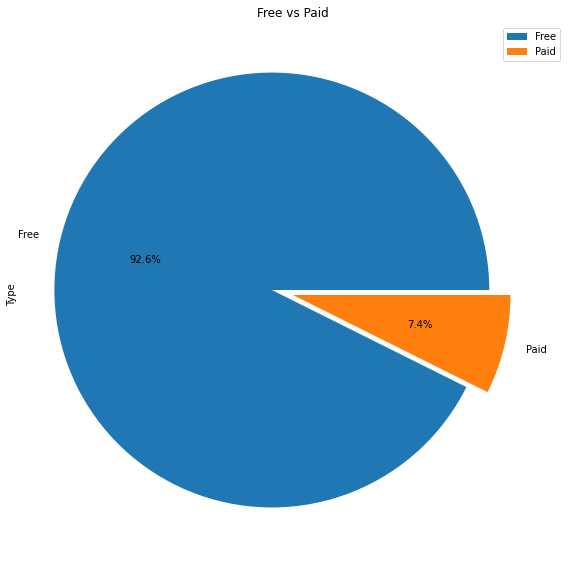

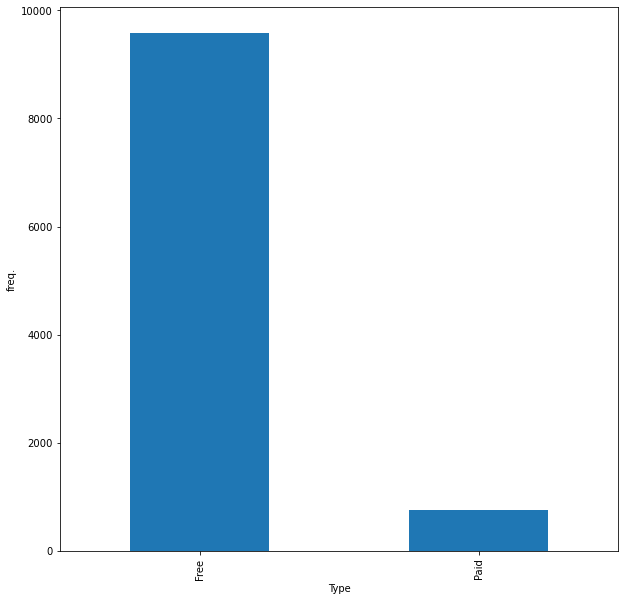

In [31]:
plt.figure(figsize=(10,10))
explode=[0.1,0]
data1['Type'].value_counts().plot(kind='pie',autopct="%.1f%%",explode=explode)
plt.legend()
plt.title("Free vs Paid")
plt.show()
plt.figure(figsize=(10,10))
data1['Type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('freq.')
plt.show()


In [32]:
#Apps with largest size

data1[data1['Size']==data1['Size'].max()]


App            Category  \
1080                                         Post Bank             FINANCE   
1565                    Talking Babsy Baby: Baby Games           LIFESTYLE   
1758                            Hungry Shark Evolution                GAME   
1793                 Mini Golf King - Multiplayer Game                GAME   
1988                            Hungry Shark Evolution                GAME   
2299                              Navi Radiography Pro             MEDICAL   
3973                            Hungry Shark Evolution                GAME   
4690                                        Vi Trainer  HEALTH_AND_FITNESS   
5427                                   Ultimate Tennis              SPORTS   
5530                       The Walking Dead: Our World                GAME   
5862                             Miami crime simulator                GAME   
5865                      Gangster Town: Vice District              FAMILY   
7404                                   SimCity BuildIt              FAMILY   
8409  Car Crash III Beam DH Real Damage Simulator 2018                GAME   
8847                        Draft Simulator for FUT 18              SPORTS   
9170                     Stickman Legends: Shadow Wars                GAME   

      Rating  Reviews         Size   Installs  Type  Price Content Rating  \
1080     4.5    60449  100000000.0    1000000  Free   0.00       Everyone   
1565     4.0   140995  100000000.0   10000000  Free   0.00       Everyone   
1758     4.5  6074334  100000000.0  100000000  Free   0.00           Teen   
1793     4.5   531458  100000000.0    5000000  Free   0.00       Everyone   
1988     4.5  6074627  100000000.0  100000000  Free   0.00           Teen   
2299     4.7       11  100000000.0        500  Paid  15.99       Everyone   
3973     4.5  6071542  100000000.0  100000000  Free   0.00           Teen   
4690     3.6      124  100000000.0       5000  Free   0.00       Everyone   
5427     4.3   183004  100000000.0   10000000  Free   0.00       Everyone   
5530     4.0    22435  100000000.0    1000000  Free   0.00           Teen   
5862     4.0   254518  100000000.0   10000000  Free   0.00     Mature 17+   
5865     4.3    65146  100000000.0   10000000  Free   0.00     Mature 17+   
7404     4.5  4218587  100000000.0   50000000  Free   0.00   Everyone 10+   
8409     3.6      151  100000000.0      10000  Free   0.00       Everyone   
8847     4.6   162933  100000000.0    5000000  Free   0.00       Everyone   
9170     4.4    38419  100000000.0    1000000  Paid   0.99   Everyone 10+   

                      Genres  
1080                 Finance  
1565  Lifestyle;Pretend Play  
1758                  Arcade  
1793                  Sports  
1988                  Arcade  
2299                 Medical  
3973                  Arcade  
4690        Health & Fitness  
5427                  Sports  
5530                  Action  
5862                  Action  
5865              Simulation  
7404              Simulation  
8409                  Racing  
8847                  Sports  
9170                  Action

In [33]:
#Apps with most no of installs
data1[data1['Installs']==data1['Installs'].max()]

App             Category  Rating  \
152                          Google Play Books  BOOKS_AND_REFERENCE     3.9   
335   Messenger – Text and Video Chat for Free        COMMUNICATION     4.0   
336                         WhatsApp Messenger        COMMUNICATION     4.4   
338               Google Chrome: Fast & Secure        COMMUNICATION     4.3   
340                                      Gmail        COMMUNICATION     4.3   
341                                   Hangouts        COMMUNICATION     4.0   
382   Messenger – Text and Video Chat for Free        COMMUNICATION     4.0   
386                                   Hangouts        COMMUNICATION     4.0   
391              Skype - free IM & video calls        COMMUNICATION     4.1   
411               Google Chrome: Fast & Secure        COMMUNICATION     4.3   
451                                      Gmail        COMMUNICATION     4.3   
464                                   Hangouts        COMMUNICATION     4.0   
865                          Google Play Games        ENTERTAINMENT     4.3   
1654                            Subway Surfers                 GAME     4.5   
1700                            Subway Surfers                 GAME     4.5   
1750                            Subway Surfers                 GAME     4.5   
1872                            Subway Surfers                 GAME     4.5   
2544                                  Facebook               SOCIAL     4.1   
2545                                 Instagram               SOCIAL     4.5   
2554                                   Google+               SOCIAL     4.2   
2604                                 Instagram               SOCIAL     4.5   
2808                             Google Photos          PHOTOGRAPHY     4.5   
2853                             Google Photos          PHOTOGRAPHY     4.5   
2884                             Google Photos          PHOTOGRAPHY     4.5   
3117                 Maps - Navigate & Explore     TRAVEL_AND_LOCAL     4.3   
3127                        Google Street View     TRAVEL_AND_LOCAL     4.2   
3223                 Maps - Navigate & Explore     TRAVEL_AND_LOCAL     4.3   
3232                        Google Street View     TRAVEL_AND_LOCAL     4.2   
3234                                    Google                TOOLS     4.4   
3454                              Google Drive         PRODUCTIVITY     4.4   
3523                              Google Drive         PRODUCTIVITY     4.4   
3665                                   YouTube        VIDEO_PLAYERS     4.3   
3687                   Google Play Movies & TV        VIDEO_PLAYERS     3.7   
3736                               Google News   NEWS_AND_MAGAZINES     3.9   
3816                               Google News   NEWS_AND_MAGAZINES     3.9   
3896                            Subway Surfers                 GAME     4.5   
3904                        WhatsApp Messenger        COMMUNICATION     4.4   
3909                                 Instagram               SOCIAL     4.5   
3928                                   YouTube        VIDEO_PLAYERS     4.3   
3943                                  Facebook               SOCIAL     4.1   
3996              Google Chrome: Fast & Secure        COMMUNICATION     4.3   
4098                 Maps - Navigate & Explore     TRAVEL_AND_LOCAL     4.3   
4144                                   Google+               SOCIAL     4.2   
4150                                    Google                TOOLS     4.4   
4153                                  Hangouts        COMMUNICATION     4.0   
4170                              Google Drive         PRODUCTIVITY     4.4   
5395                             Google Photos          PHOTOGRAPHY     4.5   
5856                         Google Play Games               FAMILY     4.3   
9844                               Google News   NEWS_AND_MAGAZINES     3.9   

       Reviews        Size    Installs  Type  Price Content Rating  \
152    1433233        

In [34]:
# App with largest number of reviews
data1[data1['Reviews']==data1['Reviews'].max()]

App Category  Rating   Reviews  Size    Installs  Type  Price  \
2544  Facebook   SOCIAL     4.1  78158306   0.0  1000000000  Free    0.0   

     Content Rating  Genres  
2544           Teen  Social

Text(0.5, 1.0, 'Apps with most reviews')

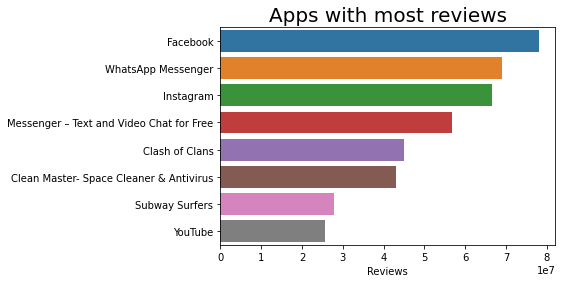

In [35]:
## most reviewed apps
import seaborn as sns
sorte = data1.sort_values(['Reviews'],ascending = 0 )[:20]
ax = sns.barplot(x = 'Reviews' , y = 'App', data = sorte  )
ax.set_xlabel('Reviews')
ax.set_ylabel('')
ax.set_title("Apps with most reviews", size = 20)

Text(0.5, 1.0, 'Most Popular Family Category Apps in Play Store')

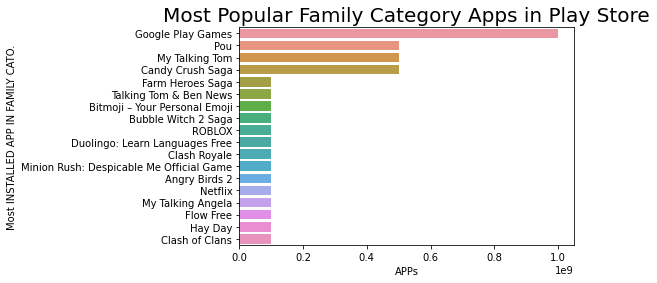

In [36]:
# most populer Apps in Family Category
data_cat=data1[data1['Category']=='FAMILY'].sort_values(['Installs'],ascending=0)[:20]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN FAMILY CATO.')
ax.set_title("Most Popular Family Category Apps in Play Store", size = 20)

Text(0.5, 1.0, 'Most Popular Games in Play Store')

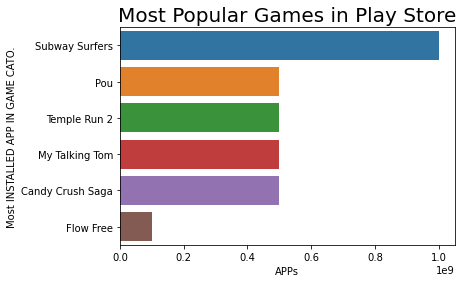

In [37]:
#Most Popular Games in Play Store
data_cat=data1[data1['Category']=='GAME'].sort_values(['Installs'],ascending=0)[:20]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN GAME CATO.')
ax.set_title("Most Popular Games in Play Store", size = 20)

Text(0.5, 1.0, 'Most Popular Tool Category Apps in Play Store')

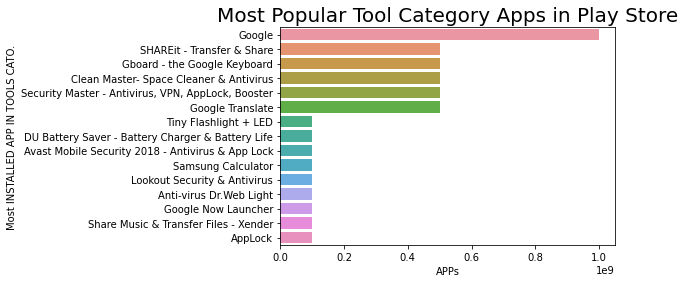

In [38]:
#Most popular Tool Category Apps in PlayStore
data_cat=data1[data1['Category']=='TOOLS'].sort_values(['Installs'],ascending=0)[:20]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN TOOLS CATO.')
ax.set_title("Most Popular Tool Category Apps in Play Store", size = 20)

Text(0.5, 1.0, 'Most Popular Business Category Apps in Play Store')

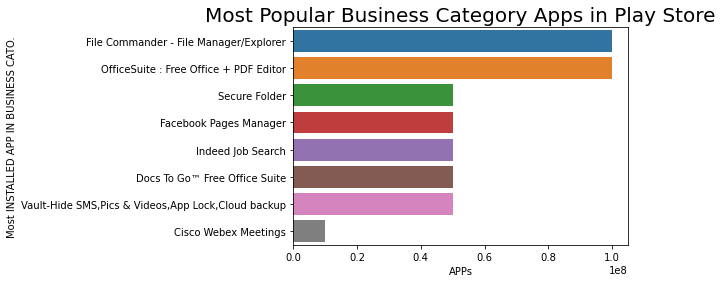

In [39]:
#Most popular Business Category Apps in PlayStore

data_cat=data1[data1['Category']=='BUSINESS'].sort_values(['Installs'],ascending=0)[:10]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN BUSINESS CATO.')
ax.set_title("Most Popular Business Category Apps in Play Store", size = 20)

In [40]:
dummy_C = pd.get_dummies(data1['Category'])
del dummy_C[dummy_C.columns[-1]]#To avoid dummy variable trap
data1 = pd.concat([data1, dummy_C], axis = 1)

In [41]:
data1.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews        Size  Installs  Type  Price Content Rating  \
0      159  19000000.0     10000  Free    0.0       Everyone   
1      967  14000000.0    500000  Free    0.0       Everyone   
2    87510   8700000.0   5000000  Free    0.0       Everyone   
3   215644  25000000.0  50000000  Free    0.0           Teen   
4      967   2800000.0    100000  Free    0.0       Everyone   

                      Genres  ...  PARENTING  PERSONALIZATION  PHOTOGRAPHY  \
0               Art & Design  ...          0                0            0   
1  Art & Design;Pretend Play  ...          0                0            0   
2               Art & Design  ...          0                0            0   
3               Art & Design  ...          0                0            0   
4    Art & Design;Creativity  ...          0                0            0   

   PRODUCTIVITY  SHOPPING  SOCIAL  SPORTS  TOOLS  TRAVEL_AND_LOCAL  \
0             0         0       0       0      0                 0   
1             0         0       0       0      0                 0   
2             0         0       0       0      0                 0   
3             0         0       0       0      0                 0   
4             0         0       0       0      0                 0   

   VIDEO_PLAYERS  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 42 columns]

In [42]:
dummy_T = pd.get_dummies(data1['Type'])
del dummy_T[dummy_T.columns[-1]]#To avoid dummy variable trap
data1 = pd.concat([data1, dummy_T], axis = 1)

In [43]:
dummy_G = pd.get_dummies(data1["Genres"])
del dummy_G[dummy_G.columns[-1]]#To avoid dummy variable trap
data1 = pd.concat([data1, dummy_G], axis = 1)

In [44]:
dummy = pd.get_dummies(data1['Content Rating'])
del dummy[dummy.columns[-1]]
data1 = pd.concat([data1, dummy], axis = 1)

In [45]:
data1.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews        Size  Installs  Type  Price Content Rating  \
0      159  19000000.0     10000  Free    0.0       Everyone   
1      967  14000000.0    500000  Free    0.0       Everyone   
2    87510   8700000.0   5000000  Free    0.0       Everyone   
3   215644  25000000.0  50000000  Free    0.0           Teen   
4      967   2800000.0    100000  Free    0.0       Everyone   

                      Genres  ...  Trivia;Education  Video Players & Editors  \
0               Art & Design  ...                 0                        0   
1  Art & Design;Pretend Play  ...                 0                        0   
2               Art & Design  ...                 0                        0   
3               Art & Design  ...                 0                        0   
4    Art & Design;Creativity  ...                 0                        0   

   Video Players & Editors;Creativity  Video Players & Editors;Music & Video  \
0                                   0                                      0   
1                                   0                                      0   
2                                   0                                      0   
3                                   0                                      0   
4                                   0                                      0   

   Weather  Adults only 18+  Everyone  Everyone 10+  Mature 17+  Teen  
0        0                0         1             0           0     0  
1        0                0         1             0           0     0  
2        0                0         1             0           0     0  
3        0                0         0             0           0     1  
4        0                0         1             0           0     0  

[5 rows x 166 columns]

In [46]:
data1.shape

(10345, 166)

In [47]:
datamodel = data1.drop(["Category", "Type", "Content Rating", "Genres", "App"], axis =1)

In [48]:
datamodel

Rating  Reviews        Size  Installs  Price  ART_AND_DESIGN  \
0      4.100000      159  19000000.0     10000    0.0               1   
1      3.900000      967  14000000.0    500000    0.0               1   
2      4.700000    87510   8700000.0   5000000    0.0               1   
3      4.500000   215644  25000000.0  50000000    0.0               1   
4      4.300000      967   2800000.0    100000    0.0               1   
...         ...      ...         ...       ...    ...             ...   
10836  4.500000       38  53000000.0      5000    0.0               0   
10837  5.000000        4   3600000.0       100    0.0               0   
10838  4.193338        3   9500000.0      1000    0.0               0   
10839  4.500000      114         0.0      1000    0.0               0   
10840  4.500000   398307  19000000.0  10000000    0.0               0   

       AUTO_AND_VEHICLES  BEAUTY  BOOKS_AND_REFERENCE  BUSINESS  ...  \
0                      0       0                    0         0  ...   
1                      0       0                    0         0  ...   
2                      0       0                    0         0  ...   
3                      0       0                    0         0  ...   
4                      0       0                    0         0  ...   
...                  ...     ...                  ...       ...  ...   
10836                  0       0                    0         0  ...   
10837                  0       0                    0         0  ...   
10838                  0       0                    0         0  ...   
10839                  0       0                    1         0  ...   
10840                  0       0                    0         0  ...   

       Trivia;Education  Video Players & Editors  \
0                     0                        0   
1                     0                        0   
2                     0                        0   
3                     0                        0   
4                     0                        0   
...                 ...                      ...   
10836                 0                        0   
10837                 0                        0   
10838                 0                        0   
10839                 0                        0   
10840                 0                        0   

       Video Players & Editors;Creativity  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
10836                                   0   
10837                                   0   
10838                                   0   
10839                                   0   
10840                                   0   

       Video Players & Editors;Music & Video  Weather  Adults only 18+  \
0                                          0        0                0   
1                                          0        0                0   
2                                          0        0                0   
3                                          0        0                0   
4                                          0        0                0   
...                                      ...      ...              ...   
10836                                      0        0                0   
10837                                      0        0                0   
10838                                      0        0                0   
10839                                      0        0                0   
10840                                      0        0                0   

       Everyone  Everyone 10+  Mature 17+  Teen  
0             1             0           0     0  
1             1             0           0     0  
2             1             0           0     0  
3           

In [49]:
datamodel.shape

(10345, 161)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = datamodel.loc[:, datamodel.columns != "Rating"]

In [52]:
y = datamodel['Rating']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [55]:
lr = LinearRegression()

In [56]:
model_lr= lr.fit(X_train, y_train)

In [57]:
y_pred_lr = model_lr.predict(X_test)

In [58]:
y_pred_lr

array([4.20281328, 4.22870256, 4.26920761, ..., 4.1759787 , 4.17546121,
       4.20588079])

In [59]:
predict_dataframe_lr = pd.DataFrame(data={"Predicted": y_pred_lr, "Actual": y_test})

In [60]:
predict_dataframe_lr

Predicted    Actual
2349   4.202813  4.700000
1931   4.228703  4.500000
186    4.269208  4.400000
9787   3.997521  4.200000
5050   4.112253  4.193338
...         ...       ...
2864   4.159339  4.300000
347    4.208640  4.300000
4636   4.175979  4.700000
2841   4.175461  4.500000
2147   4.205881  4.100000

[3104 rows x 2 columns]

<AxesSubplot:>

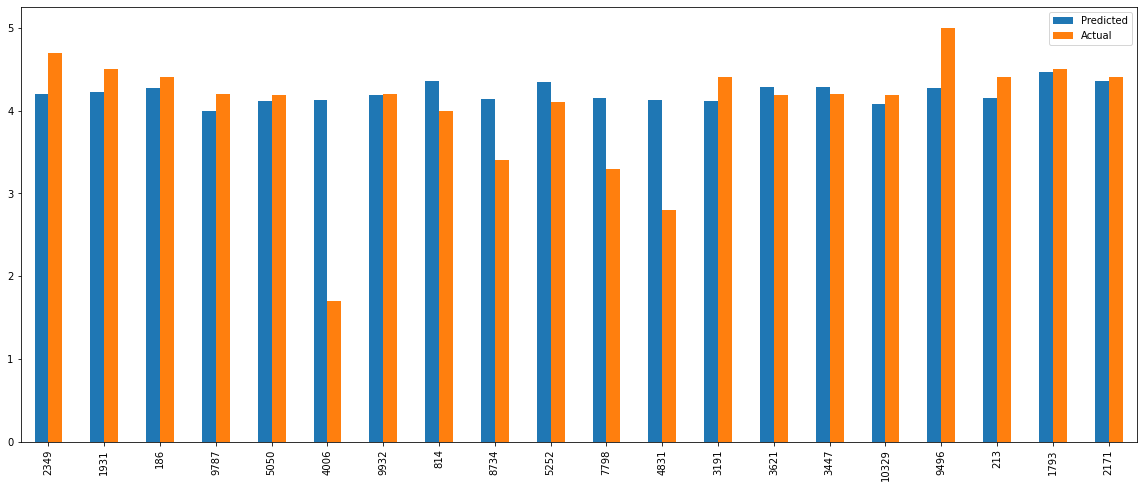

In [61]:
predict_dataframe_lr[:20].plot(kind = "bar", figsize = (20,8))

In [62]:
model_lr.score(X_test, y_test)


0.03161203187200834

In [63]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

0.4970869275979385


In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
rfr = RandomForestRegressor()

In [66]:
modef_rfr = rfr.fit(X_train, y_train)

In [67]:
y_pred_rfr = modef_rfr.predict(X_test)

In [68]:
rfr_df = pd.DataFrame(data={"Predicted": y_pred_rfr, "Actual": y_test})

In [69]:
rfr_df

Predicted    Actual
2349   4.369000  4.700000
1931   4.452000  4.500000
186    4.402000  4.400000
9787   3.956000  4.200000
5050   4.105669  4.193338
...         ...       ...
2864   4.300000  4.300000
347    4.410000  4.300000
4636   3.274867  4.700000
2841   4.292000  4.500000
2147   4.218534  4.100000

[3104 rows x 2 columns]

<AxesSubplot:>

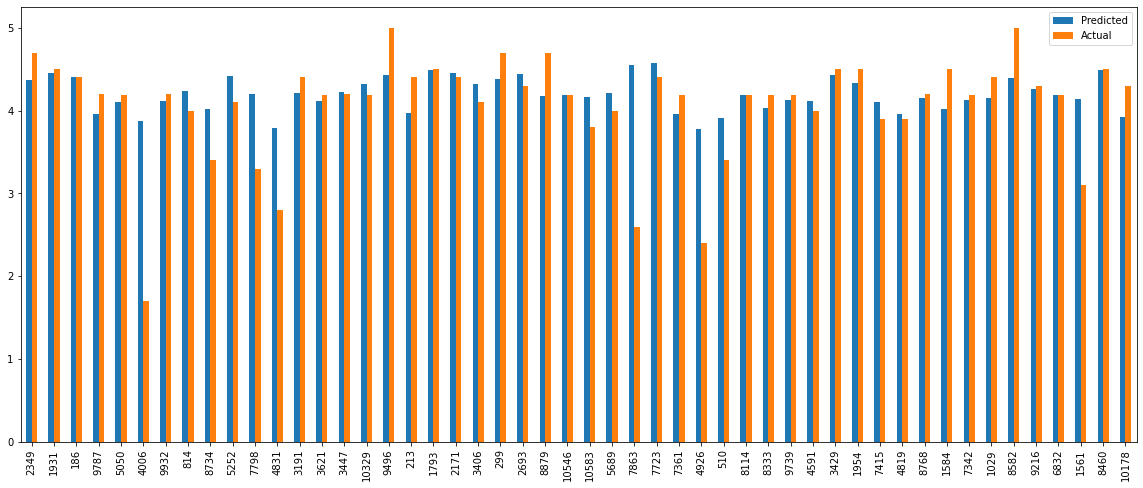

In [70]:
rfr_df[:50].plot(kind = "bar", figsize = (20,8))

In [71]:
modef_rfr.score(X_test, y_test)

0.12510362253952712

In [72]:
#!pip install catboost
from catboost import CatBoostRegressor

In [73]:
model_cb = CatBoostRegressor(task_type='CPU', iterations=100, 
                              random_state = 42)

In [74]:
model_cb.fit(X_train, y_train, plot=True, 
             eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.283064
0:	learn: 0.4667166	test: 0.4963695	best: 0.4963695 (0)	total: 182ms	remaining: 18s
1:	learn: 0.4611413	test: 0.4902819	best: 0.4902819 (1)	total: 200ms	remaining: 9.79s
2:	learn: 0.4578088	test: 0.4878107	best: 0.4878107 (2)	total: 213ms	remaining: 6.9s
3:	learn: 0.4543567	test: 0.4844523	best: 0.4844523 (3)	total: 229ms	remaining: 5.49s
4:	learn: 0.4516002	test: 0.4823211	best: 0.4823211 (4)	total: 245ms	remaining: 4.66s
5:	learn: 0.4498670	test: 0.4810825	best: 0.4810825 (5)	total: 262ms	remaining: 4.1s
6:	learn: 0.4484528	test: 0.4798242	best: 0.4798242 (6)	total: 279ms	remaining: 3.71s
7:	learn: 0.4470150	test: 0.4786484	best: 0.4786484 (7)	total: 297ms	remaining: 3.41s
8:	learn: 0.4459349	test: 0.4777706	best: 0.4777706 (8)	total: 314ms	remaining: 3.17s
9:	learn: 0.4450974	test: 0.4769203	best: 0.4769203 (9)	total: 326ms	remaining: 2.94s
10:	learn: 0.4432157	test: 0.4762495	best: 0.4762495 (10)	total: 335ms	remaining: 2.71s
11:	learn: 0.4418532	test:

In [75]:
y_pred_cb = model_cb.predict(X_test)

In [76]:
y_pred_cb

array([4.40472948, 4.40623281, 4.4682317 , ..., 4.07290474, 4.35127433,
       4.06273456])

In [77]:
cbr_df = pd.DataFrame(data={"Predicted": y_pred_cb, "Actual": y_test})

In [78]:
cbr_df

Predicted    Actual
2349   4.404729  4.700000
1931   4.406233  4.500000
186    4.468232  4.400000
9787   3.864276  4.200000
5050   4.115952  4.193338
...         ...       ...
2864   4.199377  4.300000
347    4.342599  4.300000
4636   4.072905  4.700000
2841   4.351274  4.500000
2147   4.062735  4.100000

[3104 rows x 2 columns]

<AxesSubplot:>

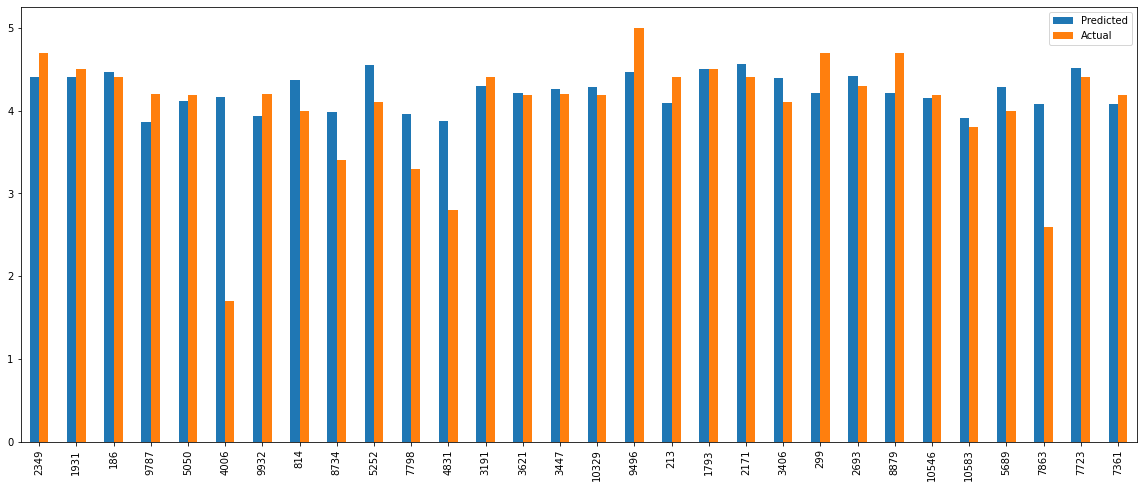

In [79]:
cbr_df[:30].plot(kind = "bar", figsize = (20,8))

In [80]:
model_cb.score(X_test, y_test)

0.15417688882970637

In [81]:
import xgboost

In [82]:
from xgboost import XGBRegressor

In [83]:
model_xg=XGBRegressor()

In [84]:
model_xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [85]:
y_pred_xg = model_xg.predict(X_test)

In [86]:
y_pred_xg

array([4.6204066, 4.456824 , 4.3787074, ..., 3.4075823, 4.3524265,
       4.1746783], dtype=float32)

In [87]:
xgb_df = pd.DataFrame(data={"Predicted": y_pred_xg, "Actual": y_test})

In [88]:
xgb_df

Predicted    Actual
2349   4.620407  4.700000
1931   4.456824  4.500000
186    4.378707  4.400000
9787   4.113378  4.200000
5050   4.026552  4.193338
...         ...       ...
2864   4.224550  4.300000
347    4.394313  4.300000
4636   3.407582  4.700000
2841   4.352427  4.500000
2147   4.174678  4.100000

[3104 rows x 2 columns]

<AxesSubplot:>

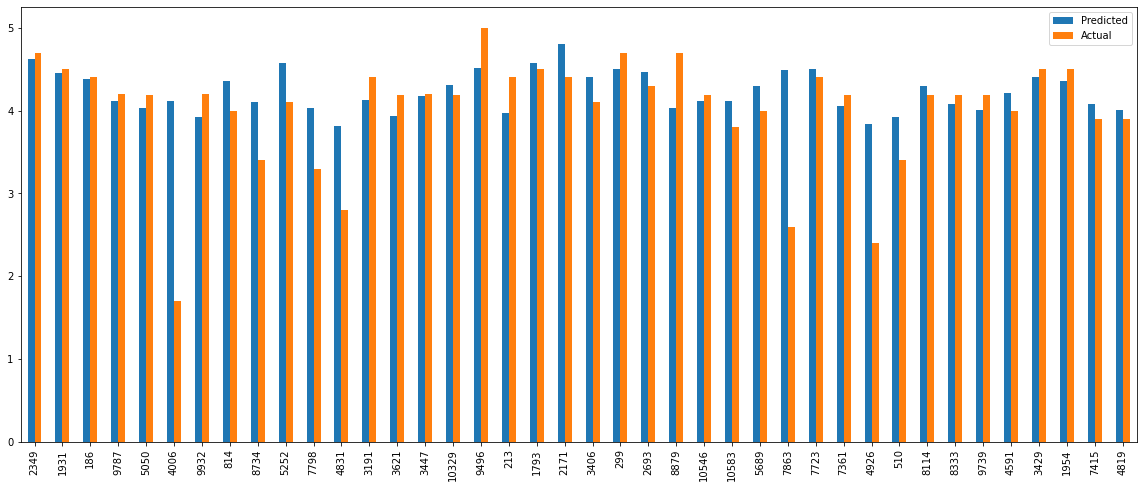

In [89]:
xgb_df[:40].plot(kind = "bar", figsize = (20,8))

In [90]:
model_xg.score(X_test, y_test)

0.11278341633981026

In [91]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_xg)

0.11278341633981026

In [92]:
print("Linear Regression Score: ", model_lr.score(X_test, y_test))
print("Random Forest Regressor Score: ", modef_rfr.score(X_test, y_test))
print("CatBoost Regressor Score: ", model_cb.score(X_test, y_test))
print("XGBoost Regressor Score: ", model_xg.score(X_test, y_test))

Linear Regression Score:  0.03161203187200834
Random Forest Regressor Score:  0.12510362253952712
CatBoost Regressor Score:  0.15417688882970637
XGBoost Regressor Score:  0.11278341633981026
